In [30]:
import torch
import pylab
import matplotlib.pyplot as plt

from src.utils.kpt_utils import get_active_kpts, kpts_2_img_coordinates

In [58]:
simitate_sample_nr = 2

simitate_sample = torch.load(f'/home/yannik/vssil/eval/ulosd_simitate_stack_128pix/ulosd_sample_{sample_nr}/sample.pt')
simitate_kpts = torch.load(f'/home/yannik/vssil/eval/ulosd_simitate_stack_128pix/ulosd_sample_{sample_nr}/key_points.pt')
simitate_kpts[..., :2] *= -1
simitate_img_coordinates = kpts_2_img_coordinates(simitate_kpts, simitate_sample.shape[-2:])

In [59]:
vssil_sample_nr = 2

vssil_sample = torch.load(f'/home/yannik/vssil/eval/ulosd_vssil_new_128pix/ulosd_sample_{sample_nr}/sample.pt')
vssil_kpts = torch.load(f'/home/yannik/vssil/eval/ulosd_vssil_new_128pix/ulosd_sample_{sample_nr}/key_points.pt')
vssil_kpts[..., :2] *= -1
vssil_img_coordinates = kpts_2_img_coordinates(vssil_kpts, vssil_sample.shape[-2:])

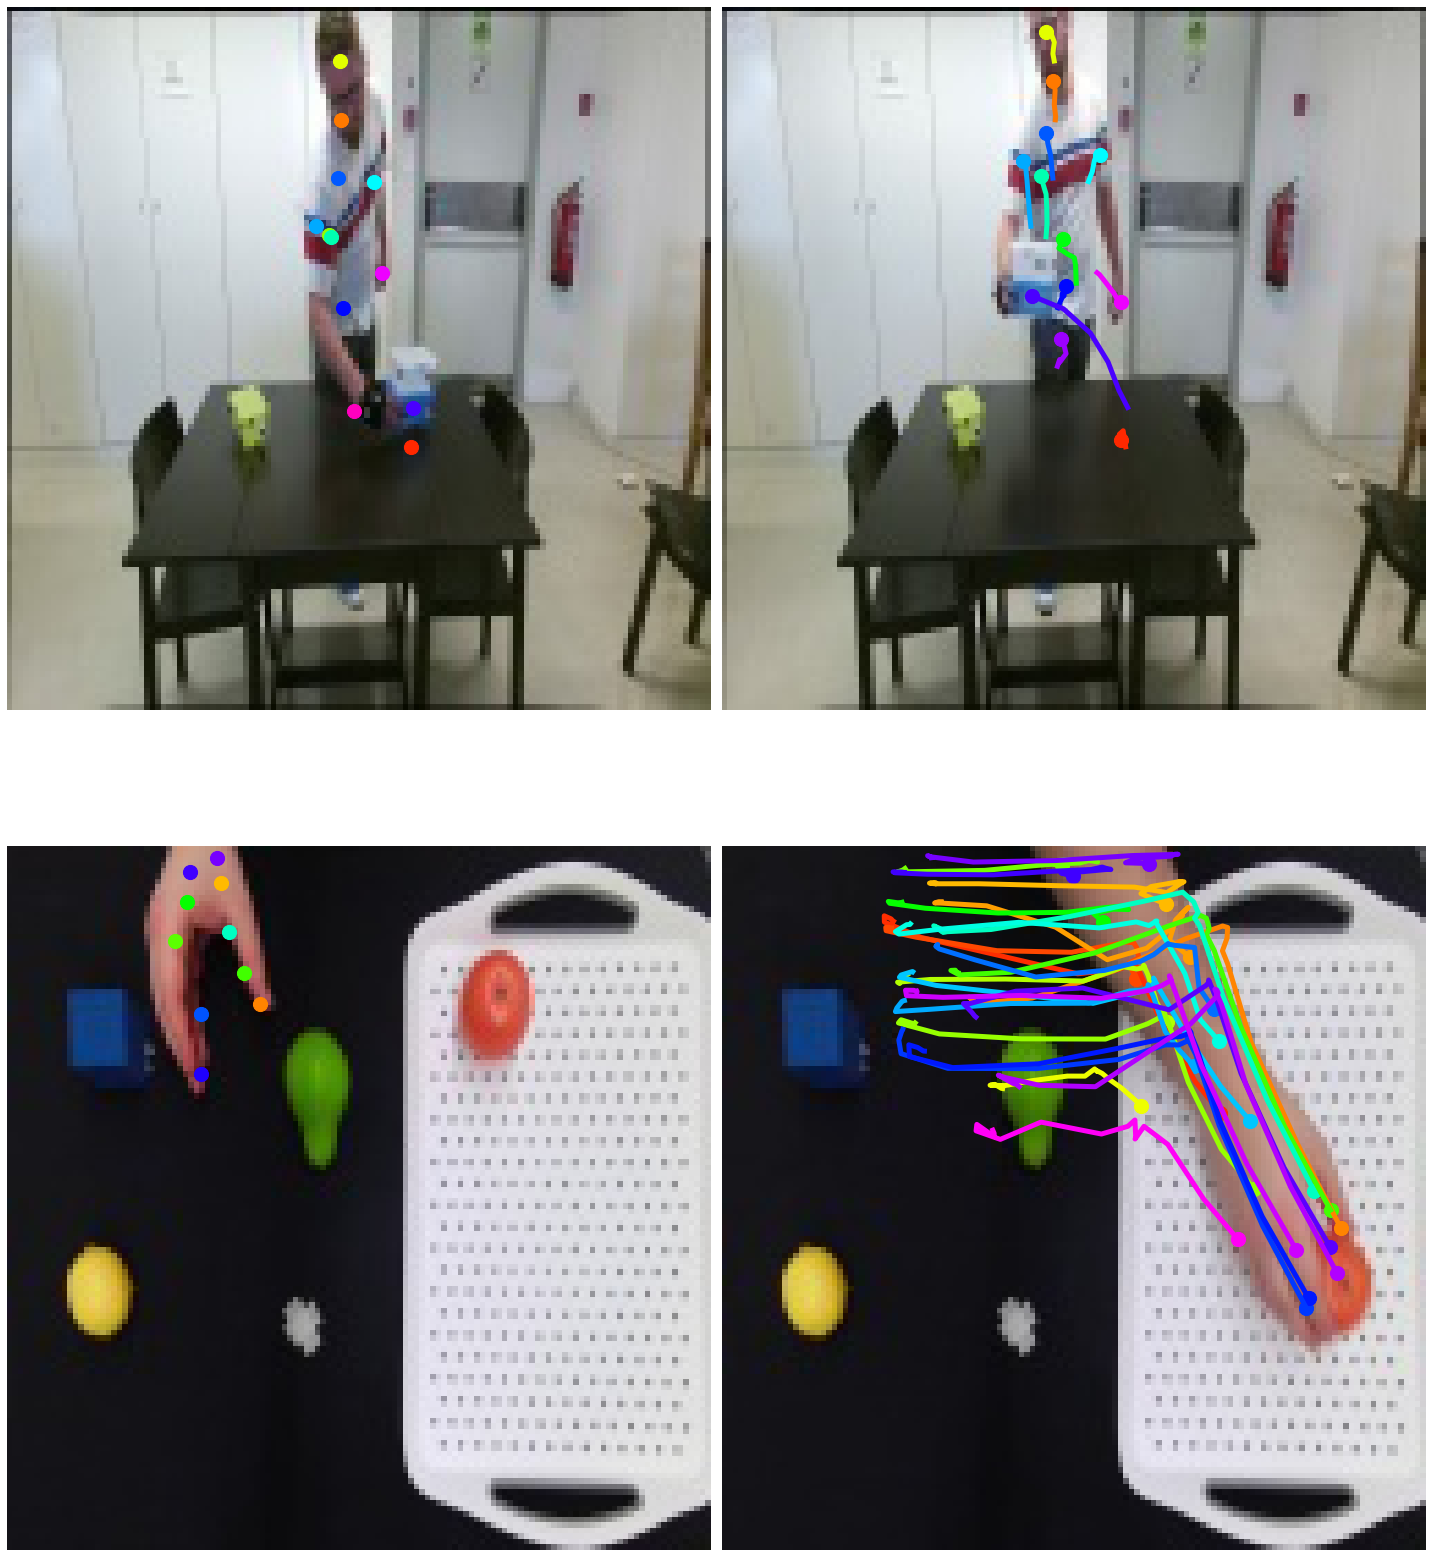

In [78]:
simitate_t0 = 3
simitate_t1 = 8

vssil_t0 = 0
vssil_t1 = 15

simitate_thresh = 0.3
vssil_thresh = 0.5

cm = pylab.get_cmap('gist_rainbow')

simitate_forbidden_k = range(0, 30)
simitate_allowed_k = range(31, kpts.shape[2])

vssil_forbidden_k = [] # range(0, 20)
vssil_allowed_k = range(0, kpts.shape[2])

fig, ax = plt.subplots(2, 2, figsize=(20, 25))

ax[0, 0].imshow(simitate_sample[0, simitate_t0].permute(1, 2, 0))
ax[0, 0].axis('off')
ax[0, 1].imshow(simitate_sample[0, simitate_t1].permute(1, 2, 0))
ax[0, 1].axis('off')

ax[1, 0].imshow(vssil_sample[0, vssil_t0].permute(1, 2, 0))
ax[1, 0].axis('off')
ax[1, 1].imshow(vssil_sample[0, vssil_t1].permute(1, 2, 0))
ax[1, 1].axis('off')

for k in simitate_allowed_k:
    
    if k not in simitate_forbidden_k:
    
        if simitate_img_coordinates[0, simitate_t0, k, 2] > simitate_thresh:
            ax[0, 0].scatter(simitate_img_coordinates[0, simitate_t0, k, 0],
                          simitate_img_coordinates[0, simitate_t0, k, 1],
                          color=cm(1.*(k-30)/len(simitate_allowed_k)),
                          s=200
                         )
        
        if simitate_img_coordinates[0, simitate_t1, k, 2] > simitate_thresh:    
            ax[0, 1].scatter(simitate_img_coordinates[0, simitate_t1, k, 0],
                          simitate_img_coordinates[0, simitate_t1, k, 1],
                          color=cm(1.*(k-30)/len(simitate_allowed_k)),
                          s=200
                         )
            ax[0, 1].plot(simitate_img_coordinates[0, simitate_t0:simitate_t1+1, k, 0],
                       simitate_img_coordinates[0, simitate_t0:simitate_t1+1, k, 1],
                       color=cm(1.*(k-30)/len(simitate_allowed_k)),
                       linewidth=5
                      )
            
            
for k in vssil_allowed_k:
    
    if k not in vssil_forbidden_k:
    
        if vssil_img_coordinates[0, vssil_t0, k, 2] > vssil_thresh:
            ax[1, 0].scatter(vssil_img_coordinates[0, vssil_t0, k, 0],
                          vssil_img_coordinates[0, vssil_t0, k, 1],
                          color=cm(1.*(k-vssil_allowed_k[0])/len(vssil_allowed_k)),
                          s=200
                         )
        
        if vssil_img_coordinates[0, vssil_t1, k, 2] > vssil_thresh:    
            ax[1, 1].scatter(vssil_img_coordinates[0, vssil_t1, k, 0],
                          vssil_img_coordinates[0, vssil_t1, k, 1],
                          color=cm(1.*(k-vssil_allowed_k[0])/len(vssil_allowed_k)),
                          s=200
                         )
            ax[1, 1].plot(vssil_img_coordinates[0, vssil_t0:vssil_t1+1, k, 0],
                       vssil_img_coordinates[0, vssil_t0:vssil_t1+1, k, 1],
                       color=cm(1.*(k-vssil_allowed_k[0])/len(vssil_allowed_k)),
                       linewidth=5
                      )
            
plt.tight_layout()
plt.show()
fig.savefig('/home/yannik/title.svg', bbox_inches='tight')